# Shifting then Tilting HG(0,0)

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm, mpmath as mp
from scipy import integrate

ModuleNotFoundError: No module named 'quadpy'

In [8]:
#constants
pi = np.pi

#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-500e-3,500e-3,1000,-500e-3,500e-3,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)


lam = params.wavelength #wavelength
w0 = params.w0 #spot size
k = params.k #wavenumber
z0 = params.z0 #waist location
Zr = params.Zr #rayleigh range


For gap half-width $b$, the right side PD:

\begin{align*}
		C_{nmn'm'}^{R} =&
		\int_{b}^{\infty} dx\int_{-\infty}^{\infty}  dy \;
		\frac{2}{\pi}
		\frac{1}{w_0 w(z)}
        \frac{1}{\sqrt{1 + \big( \frac{z-(x+a)\alpha-z_0}{z_R} \big)^2}}
		\\& \; \times
		\exp \Big(
		\frac
		{
		-ik( (x+a)^{2}+y^{2})
		}
		{2 R_c(z) - (x+a) \alpha }-
		\frac{(x+a)^{2} +y^{2}}
		{
		w_0^2
        (1 + \big( \frac{z-(x+a)\alpha -z_0}{z_R} \big)^2)}
		\Big)
		\\& \; \times
		\exp \Big(\frac{ik(x^{2}+y^{2})}{2R_{c}(z)}-
		\frac{x^{2}+y^{2}}{w(z)^{2}} \Big)
\end{align*}

In [21]:
def integ_gaps(alpha_lin,gapsize,z, a):
    
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):

        
        f = lambda y, x: (mp.exp( 1j * (x**2 + y**2)/3))
        
        #with gap 1/1000 plane width
        cr = mp.quadgl(f, [plane.ymin,plane.ymax],[500e-5,plane.xmax])
        cl = mp.quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,plane.xmin*gapsize])
        
        print(cr,cl)
        
        #args for phi_r and phi_l
        phi_r = cm.phase(cr)
        phi_l = cm.phase(cl)
        
        #result in cycles
        sol[i] = 0.5*(phi_r-phi_l)/(2*pi)
    
    print(sol[0],sol[1])
    return (sol) 

(0.49392407134033 + 0.0276058939129544j) (0.249153197994444 + 0.0190691764339167j)
(0.49392407134033 + 0.0276058939129544j) (0.249153197994444 + 0.0190691764339167j)
-0.0016356473503951825 -0.0016356473503951825


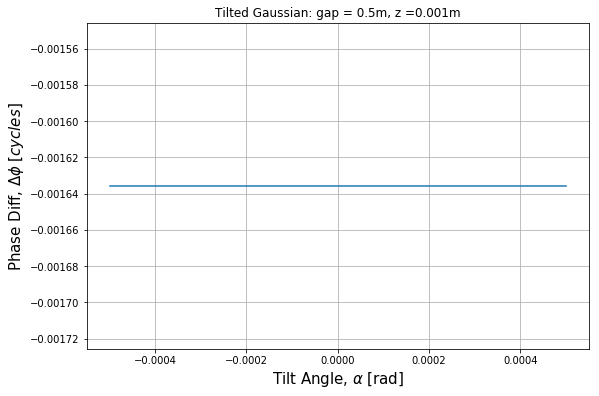

In [22]:
gapsize = 500e-3 # gap full-width [m]
z = 1e-3 # optical axis location [m]
a = 1e-3 #shift

alpha_lin = np.linspace(-500e-6,500e-6,2)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_gaps(alpha_lin,gapsize,z,a))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian: gap = ' + str(gapsize) + 'm, z =' + str(z) + 'm') 

plt.grid()

In [14]:
print(k)

5905249.348852994
